In [65]:
#(1)
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [66]:
df=pd.read_csv('heart.csv')

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
df.shape

(303, 14)

In [22]:
#(2)
numerical_discrete = []
numerical_continuous = []
for column in df.columns:
    if df[column].dtypes != 'object':
        if df[column].nunique() >= 10:
            numerical_continuous.append(column)
        else:
            numerical_discrete.append(column)
numerical_continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [23]:
numerical_discrete 

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

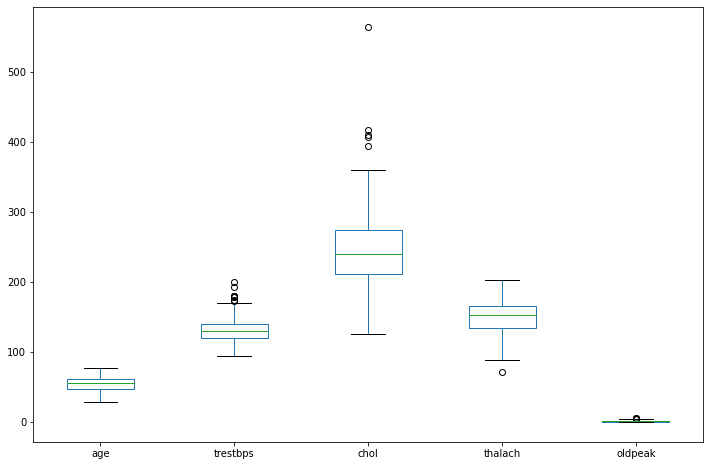

In [24]:
#(3)
df[numerical_continuous].plot(kind = 'box', figsize = (12, 8))

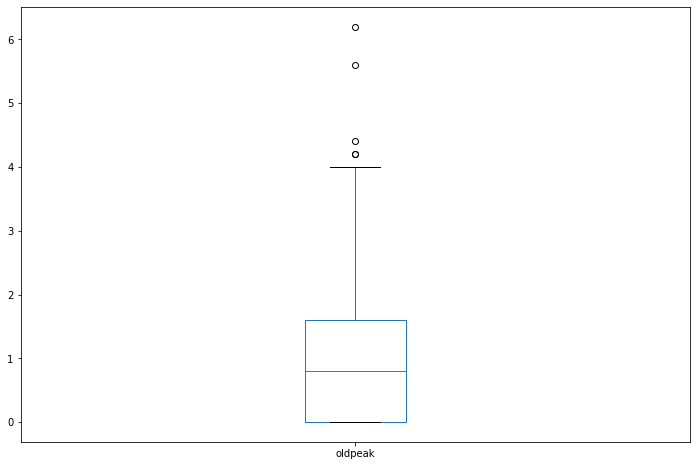

In [25]:
df['oldpeak'].plot(kind = 'box', figsize = (12, 8))

In [67]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*0.05
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper
threshold=0.05

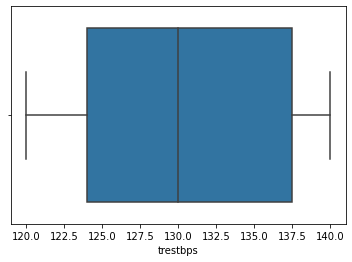

In [68]:
lower, upper = remove_outlier(df.trestbps)

df = df.loc[(df.trestbps > lower) & (df.trestbps < upper)]

sns.boxplot(df.trestbps)

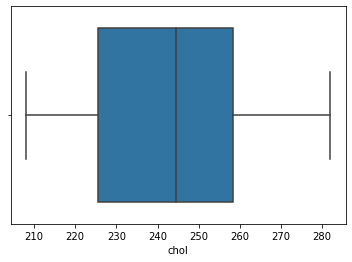

In [69]:
lower, upper = remove_outlier(df.chol)

df = df.loc[(df.chol > lower) & (df.chol < upper)]

sns.boxplot(df.chol)

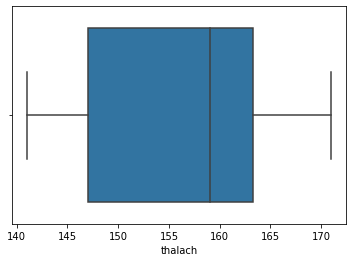

In [70]:
lower, upper = remove_outlier(df.thalach)

df = df.loc[(df.thalach > lower) & (df.thalach < upper)]

sns.boxplot(df.thalach)

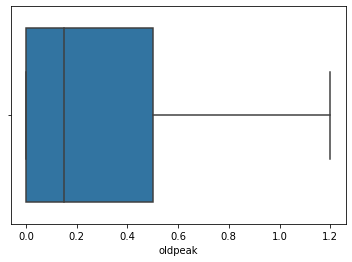

In [71]:
lower, upper = remove_outlier(df.oldpeak)

df = df.loc[(df.oldpeak > lower) & (df.oldpeak < upper)]

sns.boxplot(df.oldpeak)

In [72]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2,1


(array([4., 3., 2., 6., 1., 2., 4., 8., 3., 7.]),
 array([141., 144., 147., 150., 153., 156., 159., 162., 165., 168., 171.]),
 <a list of 10 Patch objects>)

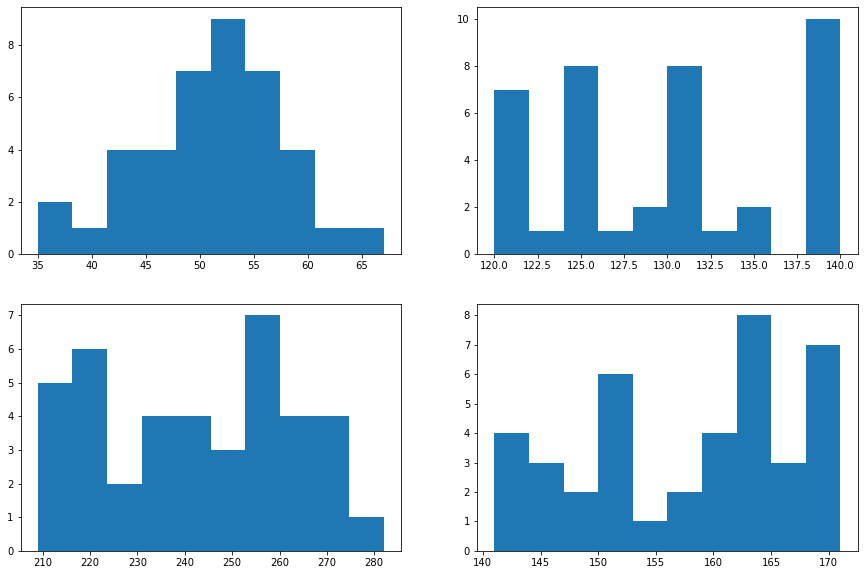

In [32]:
#(4)
fig, ax = plt.subplots(2,2,figsize=(15,10))

ax[0][0].hist(df.age)
ax[0][1].hist(df.trestbps)
ax[1][0].hist(df.chol)
ax[1][1].hist(df.thalach)

In [73]:


df['age_binned'] = pd.qcut(df.age, q=[0, .25, .50, .75, 1])
df['trestbps_binned'] = pd.qcut(df.trestbps, q=[0, .25, .50, .75, 1])
df['chol_binned'] = pd.qcut(df.chol, q=[0, .25, .50, .75, 1])
df['thalach'] = pd.qcut(df.thalach, q=[0, .25, .50, .75, 1])



In [74]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

le = LabelEncoder()

df['age'] = le.fit_transform(df['age_binned'])
df['trestbps'] = le.fit_transform(df['trestbps_binned'])
df['chol'] = le.fit_transform(df['chol_binned'])
df['thalach'] = le.fit_transform(df['thalach'])

df.drop(columns=['age_binned','trestbps_binned', 'chol_binned', 'thalach'],inplace=True)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,target
10,2,1,0,3,1,0,1,0,1.2,2,0,2,1
12,1,1,1,1,3,0,1,0,0.6,2,0,2,1
20,3,1,0,2,1,0,1,0,0.5,1,0,3,1
33,2,1,2,1,3,0,0,0,0.5,0,1,2,1
43,2,0,0,1,3,0,0,0,0.4,1,0,2,1


In [75]:
#(5)
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(model)
X_rfe = rfe.fit_transform(X, y)  
model.fit(X_rfe, y)
print(pd.Series(rfe.support_, index = X.columns))

age         False
sex          True
cp          False
trestbps     True
chol        False
fbs          True
restecg     False
exang        True
oldpeak      True
slope       False
ca          False
thal         True
dtype: bool


In [76]:
#(6)
X = df.drop('target', axis = 1)
y = df['target']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 42)
X_train

,0,1,2,3,4,5
13,0.0,0.000000,1.000000,1.000000,0.406695,-2.000000
31,-1.0,0.000000,0.000000,0.000000,0.216606,-1.000000
34,0.0,2.000000,0.000000,0.000000,0.406695,0.000000
8,0.0,1.000000,1.000000,1.000000,-0.543752,0.000000
17,0.0,-0.139494,0.000000,0.000000,0.000000,0.000000
24,-1.0,2.000000,0.000000,0.000000,-0.733841,-1.000000
0,0.0,0.000000,0.000000,0.000000,0.026516,0.000000
33,0.0,2.000000,0.000000,0.000000,-0.733841,-1.000000
5,0.0,-1.000000,0.000000,0.000000,-0.733841,-1.000000
11,0.0,2.000000,0.000000,0.000000,1.547231,-1.000000


In [78]:
#(6)
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

X_train_rs = pd.DataFrame(RobustScaler().fit_transform(X_train))

In [79]:

X_test_rs = pd.DataFrame(RobustScaler().fit_transform(X_test))

In [80]:
#(7)
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample= SMOTE(random_state=42)
X_over, y_over = oversample.fit_resample(X_train_rs, y_train)
print(Counter(y_over))

Counter({0: 16, 1: 16})


In [81]:
y_over.shape

(32,)

In [82]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [83]:
#(8)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [84]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()
}

In [85]:

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    train_score = cross_val_score(classifier, X_train, y_train, cv=5)
    train_cross_scores.append(round(train_score.mean(),2))
    test_score = cross_val_score(classifier, X_train, y_train, cv=5)
    test_cross_scores.append(round(test_score.mean(),2))
    
print(train_cross_scores)
print(test_cross_scores)

[0.83, 0.78, 0.79, 0.71, 0.74]
[0.83, 0.78, 0.79, 0.75, 0.71]


In [86]:
#(9)
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [i for i in range(10, 100, 10)]}
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid,
                    cv=5)
grid.fit(X, y)

grid.best_params_

{'n_estimators': 70}

In [87]:
clf = grid.best_estimator_
clf

RandomForestClassifier(n_estimators=70)

In [88]:
clf = clf.fit(X_train, y_train)

In [89]:
clf.score(X_test, y_test)

0.9166666666666666

In [90]:
#(10)
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = cross_val_predict(rf, X_test, y_test, cv=5)
print(roc_auc_score(y_test, rf_pred))

0.8125


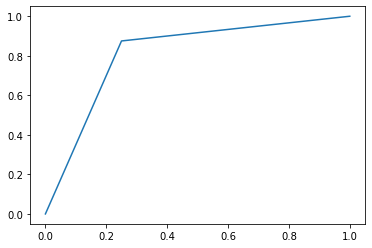

In [91]:
#(d)
fpr, tpr, _ = roc_curve(y_test, rf_pred)
plt.plot(fpr, tpr)
plt.show()

In [92]:

from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[4, 0],
       [1, 7]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

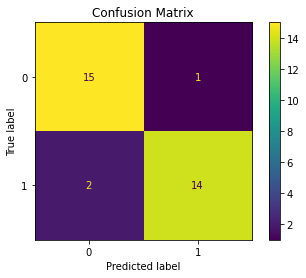

In [93]:
#(b)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_over, y_over)
plt.title('Confusion Matrix')

In [94]:
#(a)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.88      0.93         8

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12



In [54]:
import pickle

# Save an existing model to file
pickle.dump(model, open("classification_model.pkl", "wb"))